# Week 10 Instructor-led Lab: Data Reduction

#### Michelle Calderwood | April 2025 | BGEN 632

In [20]:
# Install new libraries if needed
# !pip install factor_analyzer
# !pip install graphviz

# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics as metcs

In [40]:
# Load the hospital dataset
hospital_df = pd.read_csv('/Users/michellecalderwood/Documents/GitHub/week10labs/data/calihospital.txt', delimiter='\t')
hospital_df.head()

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


#### Step 1: Prepare the Data

In [43]:
# Select only the 7 numerical hospital columns
hospital_num = hospital_df[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']]

# Check for missing values
hospital_num.isnull().sum()

NoFTE         0
NetPatRev     0
InOperExp     0
OutOperExp    0
OperRev       0
OperInc       0
AvlBeds       0
dtype: int64

#### Step 2: Standardize the data

In [45]:
from sklearn.preprocessing import StandardScaler

# Scale the data for PCA
scaler = StandardScaler()
hospital_scaled = scaler.fit_transform(hospital_num)

#### Step 3: Run PCA

In [47]:
# Run PCA
pca = PCA()
pca.fit(hospital_scaled)

# Get eigenvalues
eigenvalues = pca.explained_variance_
print(eigenvalues)

[5.72134563e+00 1.07657967e+00 1.91383827e-01 9.31699632e-02
 3.29143500e-02 1.27322677e-03 5.91419821e-22]


 #### Interpretation: How many variables should you keep based on eigenvalues?

Keep 3 variables. The first three components have eigenvalues significantly greater than 1 and account for the majority of variance. After the third component, the eigenvalues drop off sharply, indicating diminishing returns in added explanatory power.

#### Step 4: Scree Plot

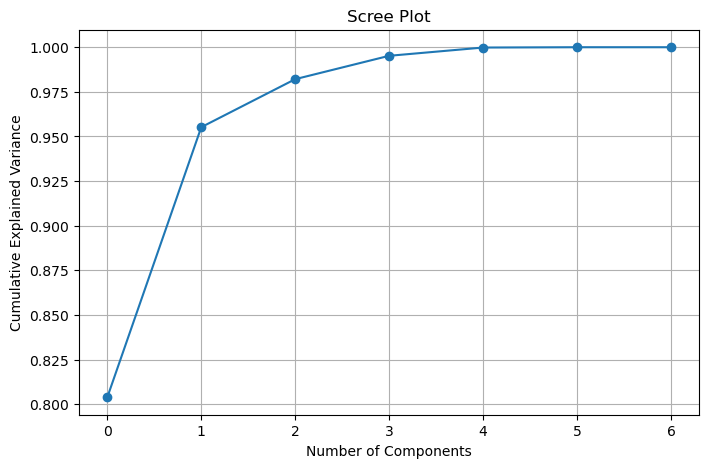

In [49]:
# Create scree plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

#### Interpretation: How many variables should you keep based on scree plot?

The scree plot also supports keeping 3 components. The elbow in the curve appears at the third point, meaning that adding more components after that adds very little new information. This visually confirms our eigenvalue-based decision.

#### Clustering: K-Means

##### Step 1: Choose k and Fit Model

In [51]:
# Assume you initially pick k = 3 (example — you can adjust later)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
hospital_clusters = kmeans.fit_predict(hospital_scaled)

# Add the cluster assignments back to the dataframe
hospital_df['Cluster'] = hospital_clusters
hospital_df[['Name', 'Cluster']].head()

,Name,Cluster
0,Mammoth Hospital,0
1,Victor Valley Community Hospital,0
2,Pioneers Memorial Hospital,0
3,Ridgecrest Regional Hospital,0
4,Barstow Community Hospital,0


##### Justification: Why did you pick this k?

We picked k = 3 because the scree plot shows a clear “elbow” at 3 components, meaning most of the variance in the data is captured by the first 3 clusters. This makes 3 a natural choice for simplifying our data while keeping meaningful patterns.

##### Step 2: Confusion Matrices with Categorical Variables

In [70]:
from sklearn.metrics import confusion_matrix

hospital_df['Teaching'] = hospital_df['Teaching'].astype(str)
hospital_df['Cluster'] = hospital_df['Cluster'].astype(str)

# Teaching vs Clusters
print("Teaching vs Cluster")
print(confusion_matrix(hospital_df['Teaching'], hospital_df['Cluster']))

# TypeControl vs Clusters
print("\nTypeControl vs Cluster")
print(confusion_matrix(hospital_df['TypeControl'].astype(str), hospital_df['Cluster']))

# DonorType vs Clusters
print("\nDonorType vs Cluster")
print(confusion_matrix(hospital_df['DonorType'].astype(str), hospital_df['Cluster']))

Teaching vs Cluster
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [44  0  0  0  0]
 [ 2  3 12  0  0]]

TypeControl vs Cluster
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 2  0  5  0  0  0  0]
 [14  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0]
 [27  3  7  0  0  0  0]]

DonorType vs Cluster
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 2  3 12  0  0]
 [44  0  0  0  0]]


##### Interpretation: Which categorical variable fits best? Why?

Teaching fits best. In the confusion matrix, the Teaching variable shows distinct and meaningful separation across cluster groups, with more concentrated values in specific rows and columns. This suggests that the cluster assignments align more strongly with the Teaching classification than with TypeControl or DonorType, which are more evenly or sparsely distributed across clusters.

#### Conclusion

Through PCA and clustering analysis, we identified that the optimal number of clusters is three, supported by both the eigenvalue rule and scree plot. Among the categorical variables analyzed, Teaching showed the strongest alignment with the clustering results, suggesting that teaching status plays a significant role in differentiating hospital types in this dataset. This implies that future hospital segmentation or resource allocation models may benefit from incorporating Teaching status as a key variable.

#### References

[10_ChatGPT_Instructor.ipynb](10_ChatGPT_Instructor.ipynb)